In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
!chcp 65001

Active code page: 65001


In [3]:
!dir\w

 Volume in drive C has no label.
 Volume Serial Number is C0D5-B7CC

 Directory of c:\



File Not Found


In [4]:
!cd C:\Users\fkfma\Desktop\국비교육-AI웹서비스\TIL\ds\

In [5]:
data = pd.read_csv("ds/snsdata.csv")
print(data.shape)
data.head() # 데이터의 수집목적은 소비시장에서 청소년들에 대한 마케팅을 위하여 수집됨

(30000, 40)


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [6]:
data.describe(include='object')

,gender
count,27276
unique,2
top,F
freq,22054


In [7]:
data.gender.value_counts(dropna=False)

F      22054
M       5222
NaN     2724
Name: gender, dtype: int64

In [8]:
data.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [9]:
def gender_to_numeric(x):
    if x=="F":
        return 1 # 여성이면 1
    elif x == 'M':
        return 2 # 남성이면 2
data['gender'] = data.gender.apply(gender_to_numeric)
data

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,2.0,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,1.0,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,2.0,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,1.0,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,2.0,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,2.0,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,2.0,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,2.0,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# 연도별 평균연령 확인
data.groupby('gradyear')['age'].mean()

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

In [11]:
# 빈값을 평균연령으로 대체
data['age'].fillna(data.groupby('gradyear')['age'].transform('mean'), inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  float64
 2   age           30000 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

<Axes: >

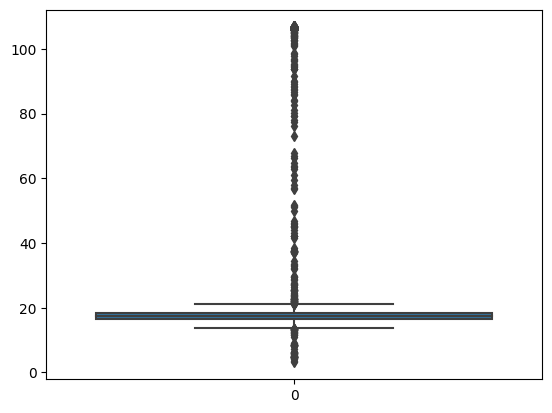

In [13]:
sns.boxplot(data['age'])

In [14]:
q1 = data['age'].quantile(0.25) # 1사분위
q3 = data['age'].quantile(0.75) # 3사분위
iqr = q3-q1
iqr

1.8874592240696728

In [15]:
print(q3+iqr*1.5)
print(q1-iqr*1.5)
low = q1-iqr*1.5
high = q3+iqr*1.5
print(data[(data['age'] <= iqr*1.5+q3) & (data['age'] >= q1-iqr*1.5)].shape)
df = data[(data['age'] <= iqr*1.5+q3) & (data['age'] >= q1-iqr*1.5)]

21.222648060174183
13.672811163895492
(29633, 40)


<Axes: >

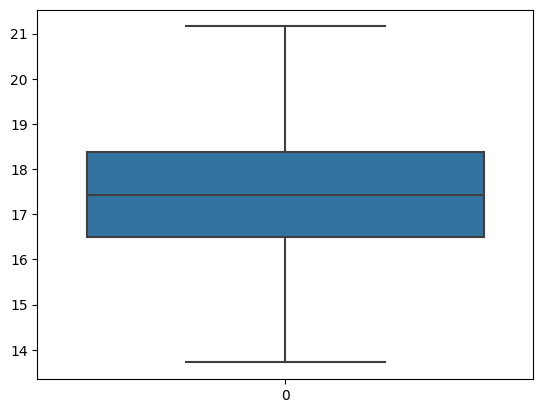

In [19]:
sns.boxplot(df["age"])

In [20]:
df.gender.value_counts(dropna=False)

1.0    21804
2.0     5138
NaN     2691
Name: gender, dtype: int64

In [21]:
df_mf = df[~df.gender.isnull()]
print(df_mf.gender.unique())
df_mf.head()

[2. 1.]


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,2.0,18.982000,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,1.0,18.801000,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,2.0,18.335000,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,1.0,18.875000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2006,1.0,19.137241,142,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [23]:
target = df_mf.gender
df_nn = df_mf.drop('gender', axis=1)
df_nn.head()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,18.982000,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,18.801000,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,18.335000,69,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,18.875000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2006,19.137241,142,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [24]:
df_n = df[df.gender.isnull()].drop('gender', axis=1)
df_n.head()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
4,2006,18.995000,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
13,2006,19.137241,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2006,19.137241,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2006,19.137241,135,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,2006,19.137241,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier().fit(df_nn, target)
pred = clf.predict(df_n)

In [26]:
pred = pd.Series(pred)
pred.name = 'gender'
pred

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2686    1.0
2687    1.0
2688    1.0
2689    1.0
2690    1.0
Name: gender, Length: 2691, dtype: float64

In [27]:
df_n = pd.concat([df_n.reset_index(drop=True), pred], axis=1)
df_n

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender
0,2006,18.995000,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1.0
1,2006,19.137241,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,2006,19.137241,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,2006,19.137241,135,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,2006,19.137241,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,2009,16.876025,45,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1.0
2687,2009,16.876025,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2688,2009,16.876025,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2689,2009,16.876025,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [28]:
df = pd.concat([df_mf.reset_index(drop=True), df_n]).reset_index(drop=True)
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,2.0,18.982000,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,1.0,18.801000,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,2.0,18.335000,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,1.0,18.875000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,1.0,19.137241,142,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [29]:
scaled_feature = df.copy()
df.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [30]:
names=df.columns[4:40]
names

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [31]:
features=scaled_feature[names]
features

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29628,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
29629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.preprocessing import StandardScaler
features.values # 배열 출력

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_feature[names] = features
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,2.0,18.982000,7,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
1,2006,1.0,18.801000,0,-0.332682,1.055779,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,1.063874,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
2,2006,2.0,18.335000,69,-0.332682,1.055779,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,2.020691,-0.220556,-0.177494
3,2006,1.0,18.875000,0,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,-0.488475,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,-0.220556,-0.177494
4,2006,1.0,19.137241,142,-0.332682,-0.358976,-0.242549,-0.218636,-0.223895,-0.26001,...,-0.050749,-0.370420,0.887997,-0.314753,-0.201558,-0.183345,-0.294188,-0.261723,2.280682,-0.177494


In [34]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()

In [37]:
predict = pd.DataFrame(dbscan.fit_predict(scaled_feature)) # 전체 열을 입력
predict.columns = ['pred']
predict

,pred
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
29628,-1
29629,-1
29630,68
29631,70


In [41]:
predict.pred.unique() # 83개

array([-1,  0,  1, 18,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 21, 13,
       24, 14, 15, 16, 81, 17, 27, 19, 20, 22, 23, 25, 26, 29, 30, 28, 31,
       32, 33, 34, 35, 36, 37, 45, 38, 39, 40, 41, 42, 43, 47, 48, 44, 46,
       49, 50, 51, 52, 53, 54, 61, 55, 56, 57, 63, 58, 59, 60, 62, 64, 65,
       66, 67, 68, 69, 70, 77, 71, 72, 73, 79, 74, 75, 76, 78, 80],
      dtype=int64)

76